In [1]:
import cv2
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json

Using TensorFlow backend.


In [23]:
def load_model():
    # Function to load and return neural network model 
    json_file = open('models/Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("weights/model_B_weights.h5")
    return loaded_model

def create_img(path):
    #Function to load,normalize and return image 
    print(path)
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im

In [24]:
def predict(path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    model = load_model()
    image = create_img(path)
    ans = model.predict(image)
    count = np.sum(ans)
    return count,image,ans

In [25]:
# partA- 104
# partB - 187

In [26]:
ans,img,hmap = predict('data/part_B_final/test_data/images/IMG_187.jpg')

data/part_B_final/test_data/images/IMG_187.jpg


In [27]:
hmap.shape

(1, 96, 128, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


159.48201


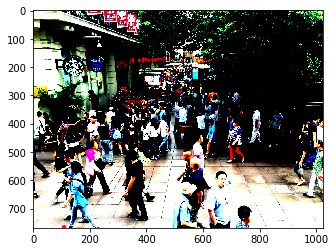

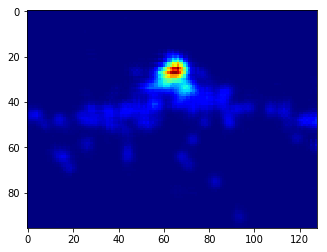

In [28]:

print(ans)
#Print count, image, heat map
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()


157.8909


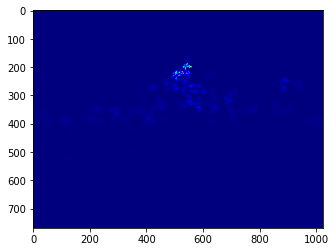

In [22]:
temp = h5py.File('data/part_B_final/test_data/ground/IMG_187.h5' , 'r')
temp_1 = np.asarray(temp['density'])
#plt.imshow(temp_1,cmap = c.jet)
print(np.sum(temp_1))
plt.imshow(temp_1 , cmap = c.jet )
plt.show()

In [34]:
img_MCNN = np.load("dmap_part_B_187.npy")
np.sum(img_MCNN)

158.99088

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


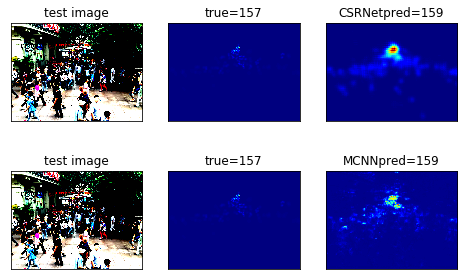

In [35]:


# Create a figure and 3 subplots in a single row
fig, axs = plt.subplots(2, 3, figsize=(8,5))

# Remove titles and axis labels from all subplots
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])


# Plot something on each of the subplots
axs[0, 0].imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
axs[0, 0].set_title('test image')
axs[0, 1].imshow(temp_1 , cmap = c.jet )
axs[0, 1].set_title('true=157')
axs[0, 2].imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
axs[0, 2].set_title('CSRNetpred=159')
axs[1, 0].imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
axs[1, 0].set_title('test image')
axs[1, 1].imshow(temp_1 , cmap = c.jet )
axs[1, 1].set_title('true=157')
axs[1, 2].imshow(img_MCNN , cmap = c.jet )
axs[1, 2].set_title('MCNNpred=159')
# Show the plot
plt.show()
